# Beat tracking error visualisation

<IPython.core.display.Javascript object>


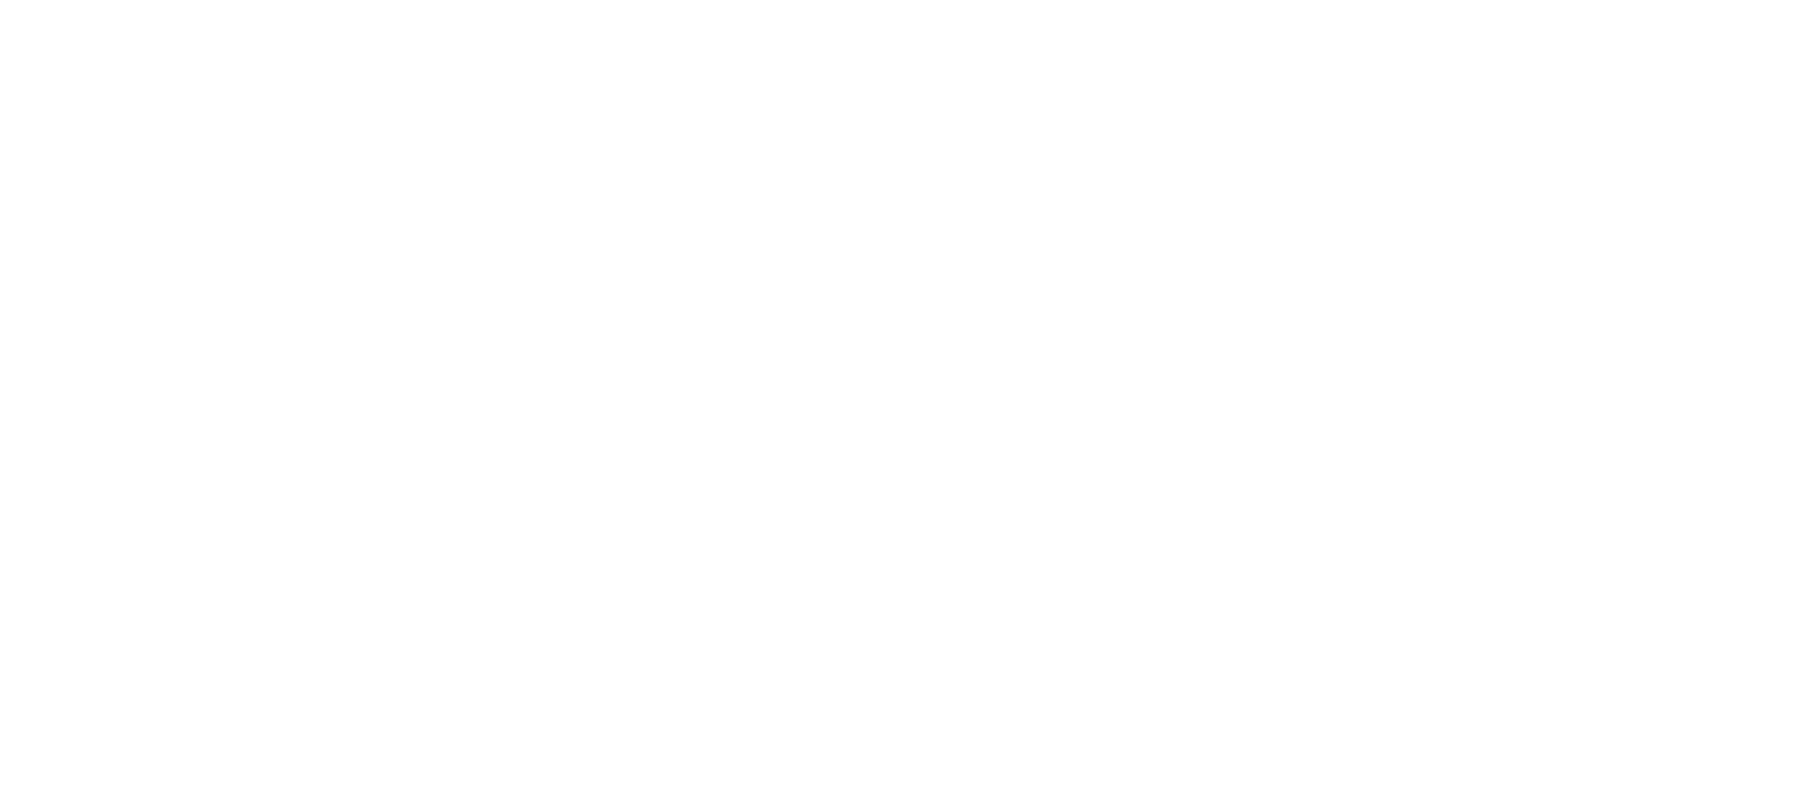

NameError: global name 'gridspec' is not defined

In [39]:
# Imports
from matplotlib import pyplot as plt
from matplotlib import gridspec
from ipywidgets import widgets, interactive, interact
# import pylab
%matplotlib notebook
# plt.rcParams['figure.figsize'] = (9,5)
import numpy as np
import pandas as pd
import os
import tracker
reload(tracker)
beat = tracker.Beat()
beat.load_metadata('solo_info')
beat.load_metadata('transcription_info')
beat.load_metadata('track_info')
# song_choices = {beat.transcription_info.filename_solo.loc[melid]:
#                 beat.transcription_info.melid.loc[melid] for melid in beat.transcription_info.index}

def plot_wrapper_from_widgets(beat_plot_widget):
    solofilename = song_selection_widget.value
    scale = beat_scale_widget.value
    thresh_val = thresh_val_widget.value
    thresh_rule = thresh_mode_widget.value
    tracker.plot_all_from_melid(beat, solofilename, scale, thresh_val, thresh_rule)

# def plot_all_from_melid(beat_plot_widget):
#     melid = song_choices[song_selection_widget.value]
#     #     print thresh_mode_widget.value
#     fig_handle = 'Comparison of beat tracking outputs'
#     plt.figure(fig_handle, figsize = [9,4])
#     plt.gcf().clf()
#     gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
#     plt.subplot(gs[0])
#     beat.ind = melid
#     beat.load_true_beats_and_downbeats()
#     beat.load_estimates()
#     b_scores, db_scores = beat.evaluate_estimates()
#     error_codes = [-1, 0, 1, 2, 3]
#     # error_names = ['Wrong', 'Perfect', '+Q', 'Half', '-Q']
#     error_colors = ['red', '#00FF00', 'purple', 'green', 'orange']
#     extension_types = [k for k in beat.beats.keys() if k is not 'true']
#     if beat_scale_widget.value is 'Downbeat':
#         tru_hits = np.zeros_like(beat.beats['true'].downbeats())-1
#     else:
#         tru_hits = np.zeros_like(beat.beats['true'].beat_onset)-1
#     for ext_i, ext_type in enumerate(extension_types):
#         if beat_scale_widget.value is 'Downbeat':
#             est_times = beat.beats[ext_type].downbeats()
#             tru_times = beat.beats['true'].downbeats()
#         else:
#             est_times = beat.beats[ext_type].beat_onset
#             tru_times = beat.beats['true'].beat_onset
#         dists, errs = tracker.compare_times(est_times, tru_times,
#                                             thresh=thresh_val_widget.value,
#                                             thresh_rule=thresh_mode_widget.value)
#         dists_rev, errs_rev = tracker.compare_times(tru_times, est_times,
#                                                     thresh=thresh_val_widget.value,
#                                                     thresh_rule=thresh_mode_widget.value)
#         tru_hits[errs_rev==0] = 0
#         for type_i,color in zip(error_codes, error_colors):
#             times_subset = [est_times[i] for i in range(len(est_times)) if errs[i]==type_i]
#             tracker.plot_beats_at_height(times_subset, y=1+ext_i+type_i*.1, h=0.3, color=color, fig_handle=fig_handle)
#     for type_i,color in zip([-1,0], ['red','black']):
#         tracker.plot_beats_at_height(tru_times[tru_hits==type_i],
#                                      # y=type_i*.25+.25, h=0.5, color=color, fig_handle=fig_handle)
#                                      y=0, h=0.5+type_i*.2, color=color, fig_handle=fig_handle)
#     plt.ylim([-.5, len(extension_types)+.5])
#     plt.yticks(range(len(extension_types)+1), ['true'] + extension_types)
#     plt.title(song_selection_widget.value)
#     plt.subplot(gs[1])
#     if beat_scale_widget.value is 'Downbeat':
#         plt.plot(np.array(db_scores.values()).transpose())
#     else:
#         plt.plot(np.array(b_scores.values()).transpose())
#     plt.tight_layout()

song_selection_widget = widgets.Dropdown(options=sorted(song_choices.keys()),
                                         description='Solo list',
                                         font_size=14,
                                         layout={'width':'50%'})

thresh_mode_widget = widgets.Dropdown(options=['relative','absolute'], description='Evaluation')
# thresh_val_widget = widgets.FloatSlider(min=0.001, max=2.0, step=0.01, description='Threshold')
thresh_val_widget = widgets.BoundedFloatText(min=0.01, max=10, step=0.01, value=0.1, description="Threshold",disabled=False)
beat_scale_widget = widgets.Dropdown(options=['Beat','Downbeat'], value='Downbeat', description='Time scale')
# song_selection_container = widgets.HBox(children=[song_selection_widget])
# display(song_selection_container)

beat_plot_widget = widgets.Button(description='Plot Beat Tracking Results',
                                  button_style='danger',
                                  layout={'width':'50%'})
beat_plot_widget.on_click(plot_wrapper_from_widgets)

# Container that contains all widgets
container = widgets.VBox(children=[song_selection_widget,
                                   widgets.HBox(children=[thresh_mode_widget, thresh_val_widget, beat_scale_widget]),
                                   beat_plot_widget])

display(container)

<IPython.core.display.Javascript object>


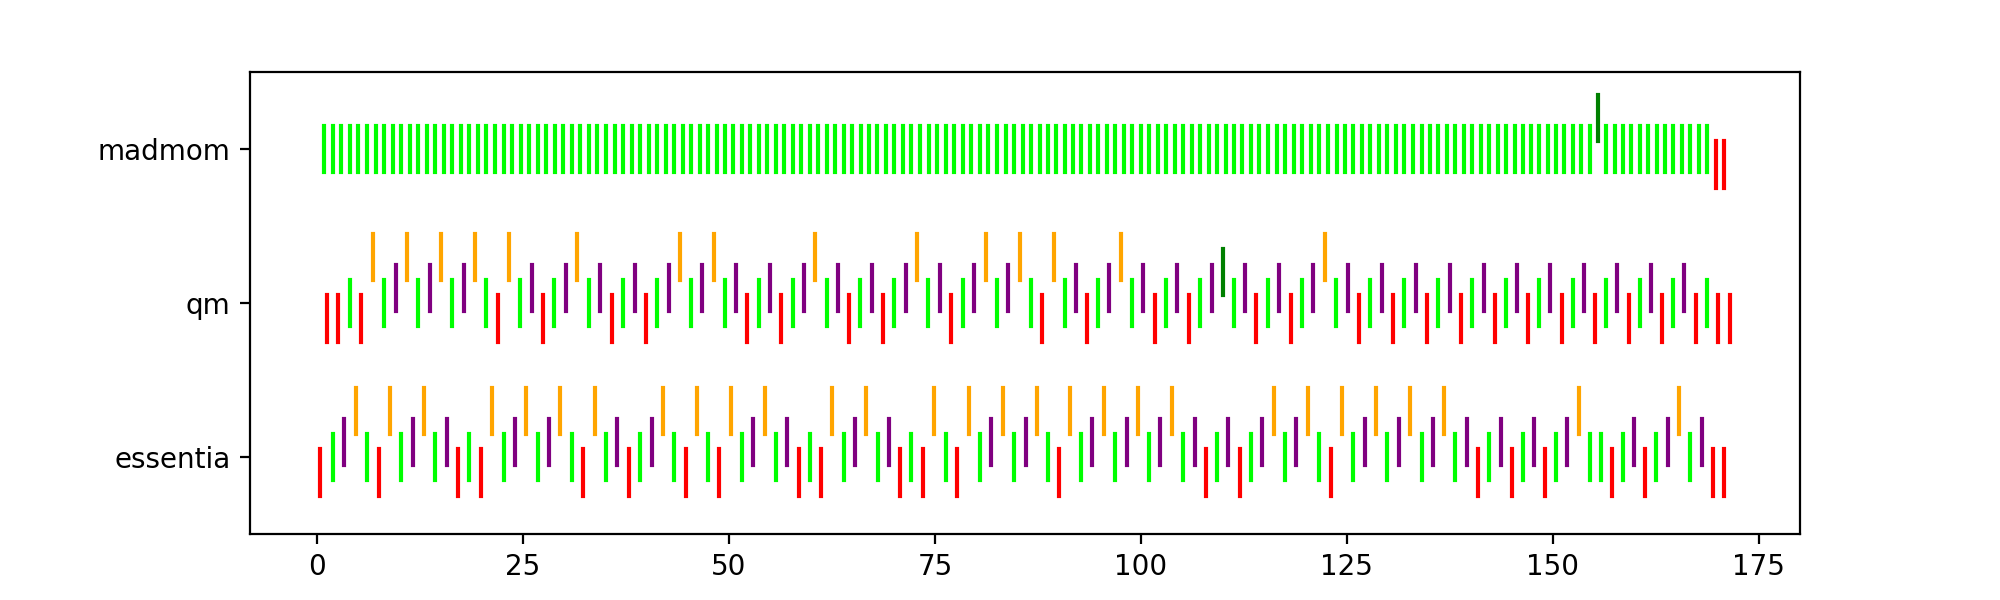

([<matplotlib.axis.YTick at 0x13bb8a650>,
 <a list of 3 Text yticklabel objects>)

In [11]:
beat.ind=50
beat.load_true_beats_and_downbeats()
beat.load_estimates()

fig_handle='tmp_plot'
plt.figure(fig_handle, figsize = [10,3])
error_codes = [-1, 0, 1, 2, 3]
# error_colors = ['red','#00a000','#a0a000','#006000','#00a0a0']
error_names = ['Wrong', 'Perfect', '+Q', 'Half', '-Q']
error_colors = ['red', '#00FF00', 'purple', 'green', 'orange']
extension_types = [k for k in beat.beats.keys() if k is not 'true']
for ext_i, ext_type in enumerate(extension_types):
    est_times = beat.beats[ext_type].downbeats()
    tru_times = beat.beats['true'].downbeats()# beat_onset()
    dists, errs = tracker.compare_times(est_times, tru_times,
                                        thresh=.1, thresh_rule='relative')
    for type_i,color in zip(error_codes, error_colors):
        times_subset = [est_times[i] for i in range(len(est_times)) if errs[i]==type_i]
        tracker.plot_beats_at_height(times_subset, y=ext_i+type_i*.1, h=0.3, color=color, fig_handle=fig_handle)
plt.ylim([-.5, 2.5])
plt.yticks(range(3), extension_types)

In [ ]:
# Pick a melid
melid = 4
beat.ind = melid
beat.load_true_beats_and_downbeats()
beat.load_estimates()
scores = beat.evaluate_estimates()
# print beat.transcription_info[beat.transcription_info.melid==melid][["melid","filename_solo"]]

In [ ]:
extype='essentia'
beat_set = beat.beats
beat_set[extype].df(1).dist_to_db
beat_set[extype].db_errors[beat_set[extype].beat==1]

In [ ]:
# beat.beats['madmom'].downbeats()
# tracker.plot_beats(beat.beats['madmom'].downbeats(), color='k')
# tracker.plot_beats(beat.beats['true'].downbeats(), y=1, color='#000070')
tracker.plot_all_beats(beat.beats,'db')
# beat.beats['madmom'].dist_to_db


In [ ]:
beat.beats['madmom'].downbeats()
# tracker.plot_beats(beat.beats['madmom'].downbeats(), color='k')
# tracker.plot_beats(beat.beats['true'].downbeats(), y=1, color='#000070')
tracker.plot_all_beats(beat.beats,'db')
# beat.beats['madmom'].dist_to_db

In [ ]:
reload(tracker)
beat=tracker.Beat()
melid = 25
beat.ind = melid
beat.load_true_beats_and_downbeats()
beat.load_estimates()
beat.evaluate_estimates()

# right_set = beat_set[extype].beat_onset[beat_set[extype].dist_to_beat<0.1]
# right_set
# beat.beats['essentia'].df(True)
# ex_types = [x for x in beat_set.keys() if x is not 'true']
# print ex_types

# SET UP RIGHT TICKS, WITH ACCURACY OVERALL?

In [ ]:
extype='qm'
len(beat_set[extype].dist_to_db[beat_set[extype].beat==1])
len(beat_set[extype].downbeats())+4

In [ ]:
extype='qm'
len(beat_set[extype].dist_to_db[beat_set[extype].beat==1])
len(beat_set[extype].downbeats())+4

In [ ]:
# Evaluation by hand:

# beat level:
beat.load_true_beats_and_downbeats(melid)
scores = tracker.get_scores(ref_beats = beat.beats['true'].beat_onset,
                            est_beats = beat.beats['qm'].beat_onset)

# get_scores returns: [f_measure, goto, p_score, information_gain] + list(cemgil) + list(continuity)
# (there are 2 values in cemgil and 4 in continuity)

# downbeat level:
scores_db = tracker.get_scores(ref_beats = beat.beats['true'].downbeats(),
                               est_beats = beat.beats['qm'].downbeats())

print scores
print scores_db

In [ ]:
# Quick evaluation of phase and period:

period_err, phase_err = tracker.get_phase_and_period_error(beat.beats['madmom'], beat.beats['true'], 'beats')

a,b,c,d = period_err
# a = est_period
# b = true_period
# c = est_period/true_period
# d = true_period/est_period

e,f,g,h = phase_err
# e = median(est_to_true)
# f = median(true_to_est)
# g = median(est_to_true)/true_period
# h = median(true_to_est)/est_period

# I decided that c and g above are the most intuitive metrics.
# c : near 1 is better (ranges from 0 to inf)
# g : near 0 is better (ranges from 0 to 0.5)

print c, g

In [ ]:
# Quickly evaluate the full corpus:
melids = np.unique(beat.solo_info.melid)
methods = ['qm','essentia','madmom']
score_list = []
for melid in melids: #(This will take about 20 seconds to process all 450 solo files)
    beat.load_true_beats_and_downbeats(melid)
    beat.ind = melid
    beat.load_estimates()
    errs = [tracker.get_phase_and_period_error(beat.beats[method], beat.beats['true'], 'downbeats') for method in methods]
    est_to_true_period = np.array(zip(*errs)[0])[:,2]
    est_to_true_phase = np.array(zip(*errs)[1])[:,2]
    score_list += [[est_to_true_period, est_to_true_phase]]

scores = np.array(score_list)
# Look at scores(i,j,k) for:
#     i = melid
#     j = index into [period, phase]
#     k = index into [qm, essentia, or madmom]]

In [ ]:
# The object, when initailised, connects to wjazzd.db, and gets all its ground truth info there. Example:
beat.load_true_beats_and_downbeats(melid=33)
beat.beats['true'].df().head(10)

In [ ]:
plt.hist(scores[:,0,2], 20)
# plt.subplot(1,2,2)
# plt.hist(scores[:,1,2], 20)


In [ ]:
# A beat-tracking run by hand:
melid=10
beat.ind=melid

beat.load_audio(melid)
# audio stored in beat.signal_mono
# complex and real spectra stored in beat.S_mono and beat.V_mono, respectively

beat.estimate_beats(extractor_type='qm')
beat.estimate_beats(extractor_type='essentia')
beat.estimate_beats(extractor_type='madmom') # This one takes the longest.
# beat-tracked output stored in beat.beats[extractor_type]
print beat.beats['qm']

# NB: essentia does not estimate downbeats, but we infer them as being in 4/4 starting on the first beat.
# print beat.beats['essentia'].df().head(10)
